# Import of data and libraries 

In [51]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import os
import seaborn as sns 

from wordcloud import WordCloud
from nltk.corpus import stopwords

from IPython.display import display, HTML

In [3]:
os.getcwd()

'/Users/anouaroussalah/Desktop/3A/SM10/Deep Learning/Project'

Here, we import manually labelled dataset, created by another project group who worked on a similar problem. Given that this dataset was created manually by reliable students, we do believe that this dataset is reliable. However, they only have two labels : positive and negative. We'll need then to find another dataset where we have neutral label.

In [26]:
df = pd.read_csv("Social-Media-Posts-On-BTC-main/dataset.csv")

In [27]:
df.label.value_counts()

1    1941
0     959
Name: label, dtype: int64

In [29]:
display(HTML(df.tail().to_html()))

,Post,label
2895,"This piece of NFT Digital art has been sold for 69M, Do you still think 60K Bitcoin is expensive? Bitcoin …",1
2896,📣 's Major Tech Company @meituofficial Puts $40 Million Into 👏 🤩💜 MEITU BUYS CRYPTO💜 Buy Bitcoin…,1
2897,I held out hope for the 40k Bitcoin crash for too long. Regret not longing at 45k when I had the chance. Bought ba…,0
2898,@inmortalcrypto @Cryptodynamix So true. Even better because I bought the shit out of that dip. bitcoin,0
2899,"When Bitcoin reaches its new ATH and some will take its profits, and you start to panic sell, do not sell it…",0


Here, we import a Kaggle dataset, where we have 3 labels as expected (positive, negative and neutral). However, this dataset might be less reliable, so we need to filter out noisy rows.

In [2]:
column_name=['created_at','text','screen_name','followers_count','favourite_count','hashtaglist','device_used','feelings']
tweet = pd.read_csv("bitcointweets.csv", parse_dates=['created_at'], encoding='utf-8', names=column_name)

In [3]:
tweet.head(7)

,created_at,text,screen_name,followers_count,favourite_count,hashtaglist,device_used,feelings
0,2018-03-23 00:40:32+00:00,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h...",myresumerocket,16522,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['neutral']
1,2018-03-23 00:40:34+00:00,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,BitMocro,1295,0,[u'Bitcoin'],"<a href=""http://twitter.com/download/android"" ...",['neutral']
2,2018-03-23 00:40:35+00:00,RT @tippereconomy: Another use case for #block...,hojachotopur,6090,0,"[u'blockchain', u'Tipper', u'TipperEconomy']","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
3,2018-03-23 00:40:36+00:00,free coins https://t.co/DiuoePJdap,denies_distro,2626,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
4,2018-03-23 00:40:36+00:00,RT @payvxofficial: WE are happy to announce th...,aditzgraha,184,0,[],"<a href=""http://twitter.com/download/android"" ...",['positive']
5,2018-03-23 00:40:36+00:00,Copy successful traders automatically with Bit...,VictorS61164810,14,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
6,2018-03-23 00:40:37+00:00,RT @bethereumteam: We're revealing our surpris...,ClarkKalel4,44,0,"[u'surprise', u'presents', u'crypto', u'bitcoin']","<a href=""http://twitter.com/download/android"" ...",['positive']


In [5]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50859 entries, 0 to 50858
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   created_at       50859 non-null  datetime64[ns, UTC]
 1   text             50859 non-null  object             
 2   screen_name      50859 non-null  object             
 3   followers_count  50859 non-null  int64              
 4   favourite_count  50859 non-null  int64              
 5   hashtaglist      50859 non-null  object             
 6   device_used      50859 non-null  object             
 7   feelings         50859 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 3.1+ MB


In [6]:
tweet.describe()

,followers_count,favourite_count
count,5.085900e+04,50859.0
mean,5.200523e+03,0.0
std,6.538524e+04,0.0
min,0.000000e+00,0.0
25%,5.500000e+01,0.0
50%,3.930000e+02,0.0
75%,2.027000e+03,0.0
max,1.019444e+07,0.0


## Data Cleaning

In [15]:
!pip install autocorrect

     |████████████████████████████████| 622 kB 10.1 MB/s eta 0:00:01
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622380 sha256=e400cabdf6bd1ba57af722973d22bd05ec5d6be8128063cce4cc7cb787d72b98
  Stored in directory: /Users/anouaroussalah/Library/Caches/pip/wheels/54/d4/37/8244101ad50b0f7d9bffd93ce58ed7991ee1753b290923934b
Successfully built autocorrect


In [ ]:
"""
from autocorrect import Speller
spell = Speller(lang='en')
#spell check
tweet=spell(tweet)
print("After Spell check the tweet is:-\n{}".format(tweet))
""" 

In [7]:
tweet = tweet[~tweet['text'].str.contains('RT')] #remove retweets

In [8]:
tweet['hashtaglist']=tweet['hashtaglist'].str.strip('[]') #cleanup square brackets
tweet['feelings']=tweet['feelings'].str.strip('[]')

In [9]:
tweet.head(7)

,created_at,text,screen_name,followers_count,favourite_count,hashtaglist,device_used,feelings
1,2018-03-23 00:40:34+00:00,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,BitMocro,1295,0,u'Bitcoin',"<a href=""http://twitter.com/download/android"" ...",'neutral'
3,2018-03-23 00:40:36+00:00,free coins https://t.co/DiuoePJdap,denies_distro,2626,0,,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",'positive'
5,2018-03-23 00:40:36+00:00,Copy successful traders automatically with Bit...,VictorS61164810,14,0,,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",'positive'
7,2018-03-23 00:40:37+00:00,One click to start mining cryptocurrencies tog...,cloud_speaker,6560,0,"u'bitcoin', u'PaaS', u'cloudnetwork'","<a href=""http://itunes.apple.com/us/app/twitte...",'neutral'
8,2018-03-23 00:40:38+00:00,"first speaker @digitsu\n\n""how we can get bitc...",MADinMelbourne,2991,0,,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",'positive'
9,2018-03-23 00:40:40+00:00,@p0nd3ea Bitcoin wasn't built to live on excha...,APompliano,96897,0,,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",'positive'
10,2018-03-23 00:40:40+00:00,@historyinflicks Buddy if I had whatever serie...,martsendo,654,0,,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",'positive'


In [21]:
import re

def clean_text(s):
    s = re.sub(r'http\S+', '', s)
    s = re.sub('(RT|via)((?:\\b\\W*@\\w+)+)', ' ', s)
    s = re.sub(r'\n', ' ', s)
    s = re.sub(r'\t', ' ', s)
    s = re.sub(r'@\S+', '', s)
    s = re.sub('&amp', ' ', s)
    return s

tweet['clean_tweet'] = tweet['text'].apply(clean_text)

In [22]:
sample = tweet.head(7)
display(HTML(sample.to_html()))

,created_at,text,screen_name,followers_count,favourite_count,hashtaglist,device_used,feelings,clean_tweet
1,2018-03-23 00:40:34+00:00,@lopp @_Kevin_Pham @psycho_sage @naval But @ProfFaustus (dum b a ss) said you know nothing about #Bitcoin ... 😂😂😂 https://t.co/SBAMFQ2Yiy,BitMocro,1295,0,u'Bitcoin',"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",'neutral',But (dum b a ss) said you know nothing about #Bitcoin ... 😂😂😂
3,2018-03-23 00:40:36+00:00,free coins https://t.co/DiuoePJdap,denies_distro,2626,0,,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",'positive',free coins
5,2018-03-23 00:40:36+00:00,"Copy successful traders automatically with Bitcoin! 💰💰\n\nI copy ""Dividend667"". Do you?\n\n➡️ https://t.co/qb2NXPknVt… https://t.co/Q43fKQRYzx",VictorS61164810,14,0,,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",'positive',"Copy successful traders automatically with Bitcoin! 💰💰 I copy ""Dividend667"". Do you? ➡️"
7,2018-03-23 00:40:37+00:00,One click to start mining cryptocurrencies together with &gt;45K people. #bitcoin https://t.co/rjZC2dia2S #PaaS #cloudnetwork,cloud_speaker,6560,0,"u'bitcoin', u'PaaS', u'cloudnetwork'","<a href=""http://itunes.apple.com/us/app/twitter/id409789998"" rel=""nofollow"">Tweets-for-Mac</a>",'neutral',One click to start mining cryptocurrencies together with &gt;45K people. #bitcoin #PaaS #cloudnetwork
8,2018-03-23 00:40:38+00:00,"first speaker @digitsu\n\n""how we can get bitcoin to be the greatest CASH in the world\nmedium of exchange, not meant… https://t.co/kV3S9kT32A",MADinMelbourne,2991,0,,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",'positive',"first speaker ""how we can get bitcoin to be the greatest CASH in the world medium of exchange, not meant…"
9,2018-03-23 00:40:40+00:00,@p0nd3ea Bitcoin wasn't built to live on exchanges.,APompliano,96897,0,,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",'positive',Bitcoin wasn't built to live on exchanges.
10,2018-03-23 00:40:40+00:00,@historyinflicks Buddy if I had whatever series of 19th diseases Bannon clearly has I'd want to be a bitcoin too.,martsendo,654,0,,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",'positive',Buddy if I had whatever series of 19th diseases Bannon clearly has I'd want to be a bitcoin too.


### Data normalization 

We neeed to have all our tweets in lowercase.

In [18]:
def lower_case(text):
    text = text.lower()
    return text

In [66]:
tweet["clean_tweet"] = tweet["clean_tweet"].apply(lower_case)

In [67]:
sample = tweet.head(7)
display(HTML(sample.to_html()))

,created_at,text,screen_name,followers_count,favourite_count,hashtaglist,device_used,feelings,clean_tweet
1,2018-03-23 00:40:34+00:00,@lopp @_Kevin_Pham @psycho_sage @naval But @ProfFaustus (dum b a ss) said you know nothing about #Bitcoin ... 😂😂😂 https://t.co/SBAMFQ2Yiy,BitMocro,1295,0,u'Bitcoin',"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",'neutral',but (dum b a ss) said you know nothing about #bitcoin ... 😂😂😂
3,2018-03-23 00:40:36+00:00,free coins https://t.co/DiuoePJdap,denies_distro,2626,0,,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",'positive',free coins
5,2018-03-23 00:40:36+00:00,"Copy successful traders automatically with Bitcoin! 💰💰\n\nI copy ""Dividend667"". Do you?\n\n➡️ https://t.co/qb2NXPknVt… https://t.co/Q43fKQRYzx",VictorS61164810,14,0,,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",'positive',"copy successful traders automatically with bitcoin! 💰💰 i copy ""dividend667"". do you? ➡️"
7,2018-03-23 00:40:37+00:00,One click to start mining cryptocurrencies together with &gt;45K people. #bitcoin https://t.co/rjZC2dia2S #PaaS #cloudnetwork,cloud_speaker,6560,0,"u'bitcoin', u'PaaS', u'cloudnetwork'","<a href=""http://itunes.apple.com/us/app/twitter/id409789998"" rel=""nofollow"">Tweets-for-Mac</a>",'neutral',one click to start mining cryptocurrencies together with &gt;45k people. #bitcoin #paas #cloudnetwork
8,2018-03-23 00:40:38+00:00,"first speaker @digitsu\n\n""how we can get bitcoin to be the greatest CASH in the world\nmedium of exchange, not meant… https://t.co/kV3S9kT32A",MADinMelbourne,2991,0,,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",'positive',"first speaker ""how we can get bitcoin to be the greatest cash in the world medium of exchange, not meant…"
9,2018-03-23 00:40:40+00:00,@p0nd3ea Bitcoin wasn't built to live on exchanges.,APompliano,96897,0,,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",'positive',bitcoin wasn't built to live on exchanges.
10,2018-03-23 00:40:40+00:00,@historyinflicks Buddy if I had whatever series of 19th diseases Bannon clearly has I'd want to be a bitcoin too.,martsendo,654,0,,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",'positive',buddy if i had whatever series of 19th diseases bannon clearly has i'd want to be a bitcoin too.


### Data Filtering 

In [30]:
tweet.describe()

,followers_count,favourite_count
count,2.300700e+04,23007.0
mean,7.123173e+03,0.0
std,8.540312e+04,0.0
min,0.000000e+00,0.0
25%,1.800000e+01,0.0
50%,2.870000e+02,0.0
75%,2.333500e+03,0.0
max,1.019444e+07,0.0


(0.0, 5000.0)

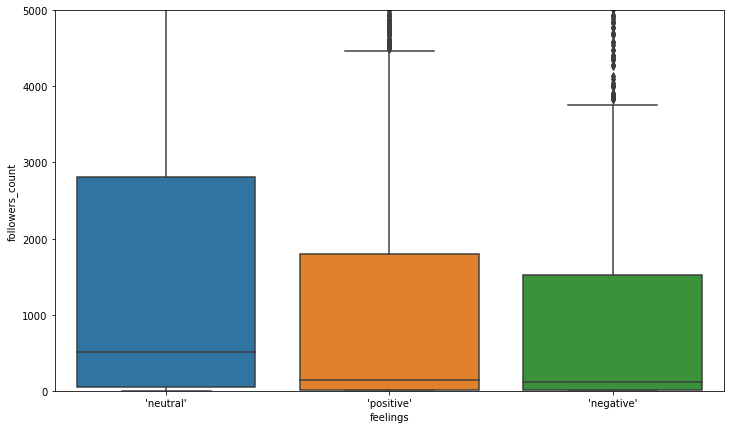

In [60]:
plt.figure(figsize=(12,7))

sns.boxplot(data=tweet, x="feelings" , y="followers_count")

plt.ylim(0, 5e3)

In [68]:
relevant_features = ["text", "screen_name", "clean_tweet", "feelings"]

display(HTML(tweet[tweet.followers_count>1e6][relevant_features].to_html()))

,text,screen_name,clean_tweet,feelings
4189,ICE Agency Charges Payza and Two Canadian Citizens With Bitcoin Money Laundering https://t.co/3DJAeGI81R https://t.co/a83eW5WMej,michael_0000,ice agency charges payza and two canadian citizens with bitcoin money laundering,'neutral'
4558,Social communication is our business https://t.co/aJ9TQygtqv \n#wsj #nytimes #reuters #bloomberg #thestreet… https://t.co/R4PyEjCbMc,socialstartnow,social communication is our business #wsj #nytimes #reuters #bloomberg #thestreet…,'positive'
6154,#Bitcoin spike sparks ‘crypto-jacking’ trend https://t.co/vMz3L3V7RA,RT_com,#bitcoin spike sparks ‘crypto-jacking’ trend,'neutral'
6986,Twitter CEO says Bitcoin will be the world’s primary currency by 2028 https://t.co/QHYtZw5CIn,TheNextWeb,twitter ceo says bitcoin will be the world’s primary currency by 2028,'positive'
8140,Amazing Breakdown Of The 5 Big Cryptos: Uses and Features In The Real World Read More Here: https://t.co/eLX4bWUvJJ… https://t.co/N6zgY6lhaX,nucfootball,amazing breakdown of the 5 big cryptos: uses and features in the real world read more here:,'positive'
8887,"For the first time, NYC buyers pay for condos in bitcoin https://t.co/Zmk7gw2kXc https://t.co/rBUaeUcNCS",nypost,"for the first time, nyc buyers pay for condos in bitcoin",'positive'
14515,Interesting! https://t.co/2xDVAewB5i,icokingmaker,interesting!,'positive'
16816,Bitcoin is bonkers right now. Here's why you shouldn't count it out. https://t.co/UAsojkcRx2 https://t.co/IjdEXecMRf,PopSci,bitcoin is bonkers right now. here's why you shouldn't count it out.,'positive'
18153,Freedom is yours for the taking at The Soba Recovery Center 24 HR Helpline 866 447 5298 https://t.co/dzku4mm40E… https://t.co/4CwNlgfMQM,socialstartnow,freedom is yours for the taking at the soba recovery center 24 hr helpline 866 447 5298,'negative'
25707,Enjoy Family Freedom at The Soba Recovery Center 24 HR Helpline 866 447 5298 https://t.co/dzku4mm40E #sober… https://t.co/ZnLDMP04Qn,socialstartnow,enjoy family freedom at the soba recovery center 24 hr helpline 866 447 5298 #sober…,'positive'


In [63]:
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anouaroussalah/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

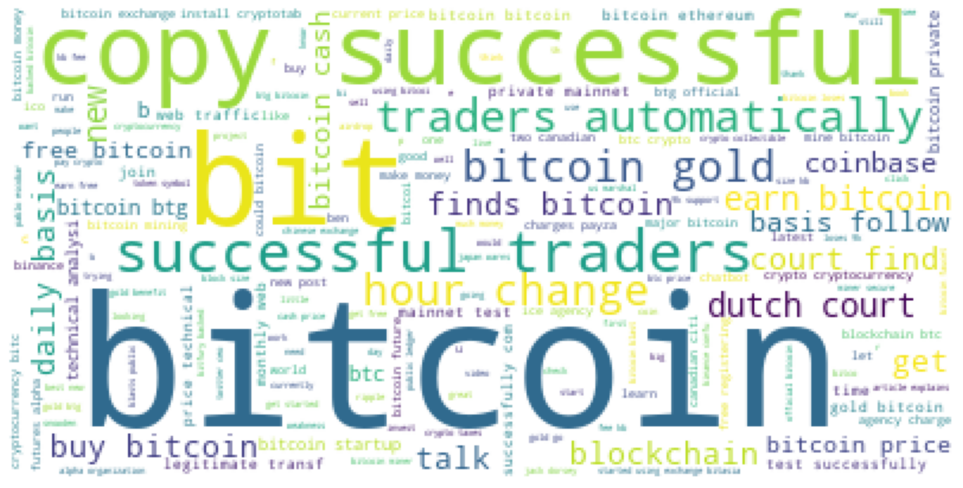

In [69]:
text = tweet["clean_tweet"].to_string()
wordcloud = WordCloud(relative_scaling=0.5 , background_color='white',stopwords=set(stopwords.words('english'))).generate(text)
plt.figure(figsize=(17,17))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [70]:
lexical_dict = ["bitcoin", "bitcoins", "btc", "crypto", "cryptos", "cryptocurrency", "cryptocurrencies", "blockchain", "coin", "coins"]